<a href="https://colab.research.google.com/github/vidulaarumugam/Machine-learning_vidula/blob/main/lab3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as nm
import pandas as ps

from google.colab import files
file = files.upload()

Saving t5_train (1).xlsx to t5_train (1).xlsx


In [ ]:
excel = ps.ExcelFile('t5_train (1).xlsx')
data = ps.read_excel(excel, 'Sheet1')

In [ ]:
#A1)Evaluate the intraclass spread and interclass distances between the classes in your dataset
grouped_data1 = data.groupby('embed_0')
grouped_data2 = data.groupby('embed_5')

#Calculate the centroid mean for each class
centroid1 = grouped_data1.mean()
centroid2 = grouped_data2.mean()
print("Class Centroid of class 1:",centroid1)
print("Class Centroid of class 2:",centroid2)

#Calculate spread (standard deviation) for each class
intraclass_spread1 = grouped_data1.var()
intraclass_spread2 = grouped_data2.var()
print("Inter class spread of class 1:",intraclass_spread1)
print("Inter class spread of class 2:",intraclass_spread2)

#Calculate the distance between mean vectors between classes
dist1 = nm.linalg.norm(centroid1 - centroid2)
dist2 = nm.linalg.norm(centroid1 - centroid2)
print("Euclidian Distance of class 1:",dist1)
print("Euclidian Distance of class 2:",dist2)

Class Centroid of class 1:            Unnamed: 0   embed_1   embed_2   embed_3   embed_4   embed_5  \
embed_0                                                                   
-0.093720        63.0  0.012538  0.032916  0.000575 -0.011344 -0.005308   
-0.093552        62.0  0.005757  0.039849 -0.018698 -0.005316 -0.011103   
-0.088469       725.0 -0.010194  0.051124  0.006132 -0.010426 -0.012661   
-0.086676       576.0 -0.003028  0.017894  0.025240 -0.012534  0.010928   
-0.086598        94.0  0.014755  0.033838  0.003005 -0.016856 -0.003538   
...               ...       ...       ...       ...       ...       ...   
 0.009432       854.0 -0.022003  0.017973  0.034937 -0.008843  0.021839   
 0.009859       810.0 -0.038462  0.008427  0.038733 -0.015636  0.014513   
 0.010180      1055.0 -0.011995  0.032084  0.041886 -0.012140  0.014416   
 0.012481      1028.0 -0.016168  0.009283  0.029264 -0.001487  0.016737   
 0.014936       995.0 -0.016443  0.009737  0.019627 -0.011630  0.015741  

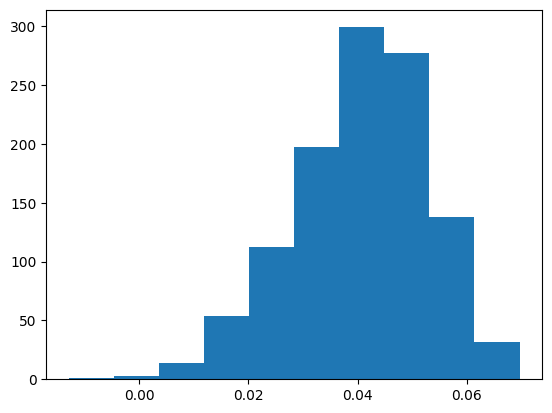

(array([  1,   3,  14,  54, 112, 197, 299, 277, 138,  32]), array([-0.01297887, -0.0047093 ,  0.00356026,  0.01182983,  0.02009939,
        0.02836896,  0.03663852,  0.04490809,  0.05317765,  0.06144722,
        0.06971678]))
Mean:0.04068505144036584
Variance:0.00015191073472770316


In [ ]:
#A2)Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and variance from the available data.

import matplotlib.pyplot as plot
d = data['embed_10']
plot.hist(d, bins=10)
plot.show()
y=nm.array(data['embed_10'])
h = nm.histogram(y)
print(h)
print("Mean:"+str(y.mean()))
print("Variance:"+str(y.var()))

[19.736852162284777, 0.7303400526070902, 0.2610080160266892, 0.16139211606109416, 0.12334794243433905, 0.10438328555107156, 0.09339245954605124, 0.08637541745418105, 0.08158289674868288, 0.07814335813480806]


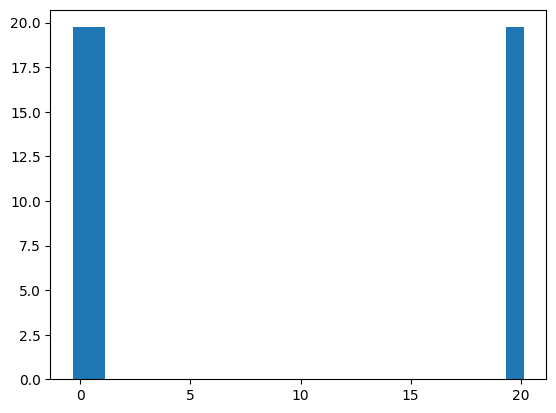

In [ ]:
#A3) Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 to 10.
#Make a plot of the distance and observe the nature of this graph.
from scipy.spatial import distance
vector1 = nm.array(data["embed_3"])
vector2 = nm.array(data["embed_57"])
minkowski = []
# Calculate Minkowski distances from 1 to 10
for i in range (1,11):
  minkowski = minkowski+[distance.minkowski(vector1,vector2, i)]
print(minkowski)

max_val = nm.max(minkowski)
plot.bar(minkowski,max_val)
plot.show()



In [ ]:
#A4)Divide dataset in your project into two parts –train & test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data = ps.read_excel(excel, 'Sheet1')
num_bins = 4

# Perform equal width binning
data['embed_1_b'] = ps.cut(data['embed_1'], num_bins)
data['embed_12_b'] = ps.cut(data['embed_12'], num_bins)
from sklearn.model_selection import train_test_split
#for one class
X = data['embed_1']
y = data['embed_1_b']
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
#other class
X1 = data['embed_1']
y1 = data['embed_1_b']
X1 = X1.values.reshape(-1, 1)
y1 = y1.values.reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print("X_train shape:", X1_train.shape)
print("y_train shape:", y1_train.shape)
print("X_test shape:", X1_test.shape)
print("y_test shape:", y1_test.shape)










X_train shape: (901, 1)
y_train shape: (901, 1)
X_test shape: (226, 1)
y_test shape: (226, 1)
X_train shape: (901, 1)
y_train shape: (901, 1)
X_test shape: (226, 1)
y_test shape: (226, 1)


In [ ]:
#A5) Train a kNN classifier (k =3)using the training set obtained

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train_encoded = label_encoder.fit_transform(X_train)
y_train_encoded = label_encoder.fit_transform(y_train)

y_train_encoded= y_train_encoded.reshape(-1, 1)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train_encoded)

y_pred = knn_classifier.predict(X_test)
print(y_pred)


[1 1 1 1 2 2 0 1 1 2 2 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 2 1 2 1 1 1 2 1 1
 0 1 1 0 1 2 0 2 1 1 2 1 2 2 1 1 2 0 0 1 1 1 2 2 2 2 1 1 2 1 1 1 1 1 1 1 2
 2 1 1 0 1 1 1 2 0 1 1 1 2 2 1 1 0 0 2 0 0 1 1 1 1 0 1 1 2 1 1 1 2 2 1 2 1
 1 2 2 1 2 2 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 3 2 1 2 0 2 2 2 1 2
 2 2 2 0 1 1 2 2 2 0 2 1 2 0 2 2 0 1 0 1 2 1 1 2 2 1 0 0 2 1 2 2 1 2 1 1 1
 1 1 1 0 0 1 1 2 1 0 0 1 3 2 1 2 1 1 2 1 0 1 1 1 2 1 1 1 2 1 1 2 0 1 1 1 0
 0 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#A6)Test the accuracy of the kNNusing the test set obtained from above exercise
y_test_encoded = label_encoder.transform(y_test)
y_test_encoded= y_test_encoded.reshape(-1, 1)

score = knn_classifier.score(y_test_encoded, y_pred)
print(score)

0.008849557522123894


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
#A7)Use the predict() function to study the prediction behavior
from sklearn.neighbors import KNeighborsClassifier
knn_classifier.predict(X_test)



array([1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2,
       1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 3,
       2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[1.0, 0.9988901220865705, 1.0, 0.9977802441731409, 0.9988901220865705, 0.9977802441731409, 0.9988901220865705, 0.9966703662597114, 0.9988901220865705, 0.9977802441731409]
[1.0, 0.9988901220865705, 1.0, 0.9977802441731409, 0.9988901220865705, 0.9977802441731409, 0.9988901220865705, 0.9966703662597114, 0.9988901220865705, 0.9977802441731409]


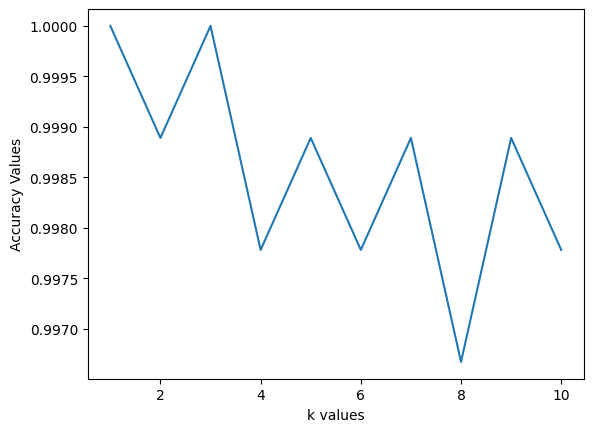

In [ ]:
#A8)Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.
X_train_encoded= X_train_encoded.reshape(-1, 1)
y_train_encoded= y_train_encoded.reshape(-1, 1)
value=[]
for i in range(1,11):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train_encoded, y_train_encoded)
  xy_acc = neigh.score(X_train_encoded,y_train_encoded)
  value = value + [xy_acc]
print(value)
print(value)
k_values = [1,2,3,4,5,6,7,8,9,10]
plot.plot(k_values,value)
plot.xlabel("k values")
plot.ylabel("Accuracy Values")
plot.show()

In [ ]:
#A9)evaluate confusion matrix for your classification problem
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(conf_matrix)

#precision
precision = precision_score(y_test_encoded, y_pred, average='weighted')

#recall
recall = recall_score(y_test_encoded, y_pred, average='weighted')

# F1-Score
f1 = f1_score(y_test_encoded, y_pred, average='weighted')


# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
if precision < 0.5 and recall < 0.5:
    print("The model is likely underfitting.")
elif precision > 0.8 and recall < 0.5:
    print("The model is likely overfitting.")
else:
    print("The model is achieving a balanced fit.")











[[ 37   0   0   0]
 [  0 120   0   0]
 [  0   0  67   1]
 [  0   0   0   1]]
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
The model is achieving a balanced fit.
